In [1]:
from skimage import io, exposure, img_as_ubyte
import  matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
from  pandas import DataFrame as df

/Users/keriabermudez/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline
%cd images

/Users/keriabermudez/Dropbox/Imaging_Class/images


## Histograms

In [4]:
img = io.imread("SW_Grey.tif")

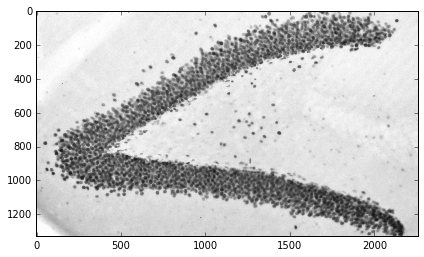

In [5]:
io.imshow(img)

(0, 255)

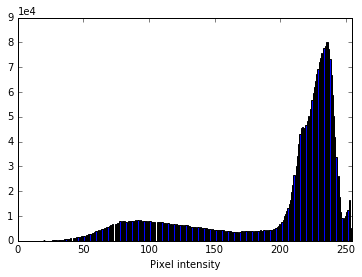

In [6]:
fig1 ,ax = plt.subplots(nrows =1, ncols=1)
# Display histogram
ax.hist(img.flatten(), bins=256)
ax.ticklabel_format(axis='y', scilimits=(0, 0))
ax.set_xlabel('Pixel intensity')
ax.set_xlim(0, 255)

## Cumulative Distribution

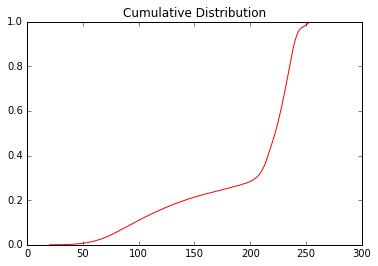

In [7]:
fig2 ,ax2 = plt.subplots(nrows =1, ncols=1)
img_cdf, bins = exposure.cumulative_distribution(img, 256)
ax2.plot(bins, img_cdf, 'r')
ax2.set_title("Cumulative Distribution")

## Increasing Contrast

In [8]:
img = io.imread("3H_1_c2.tif")

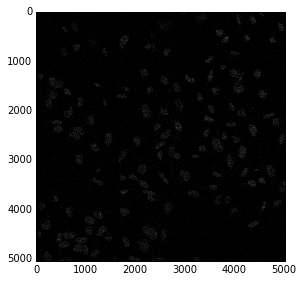

In [9]:
io.imshow(img)

(0, 255)

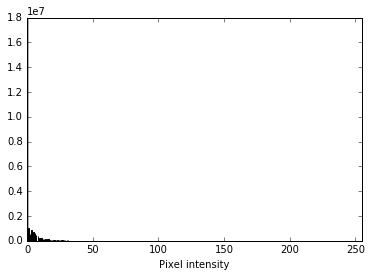

In [10]:
fig1 ,ax = plt.subplots(nrows =1, ncols=1)
# Display histogram
ax.hist(img.flatten(), bins=256)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax.set_xlabel('Pixel intensity')
ax.set_xlim(0, 255)

In [11]:
rescaled = exposure.rescale_intensity(img)

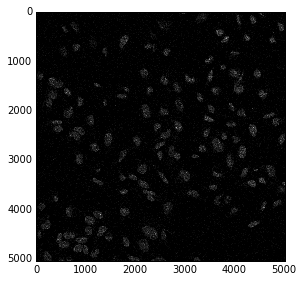

In [12]:
io.imshow(rescaled)

In [13]:
io.imsave("rescaled.tif",rescaled)

(0, 255)

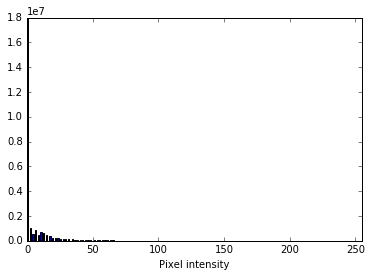

In [14]:
fig1 ,ax = plt.subplots(nrows =1, ncols=1)
# Display histogram
ax.hist(rescaled.flatten(), bins=256)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax.set_xlabel('Pixel intensity')
ax.set_xlim(0, 255)

In [15]:
rescaled_equalized = exposure.equalize_adapthist(img)

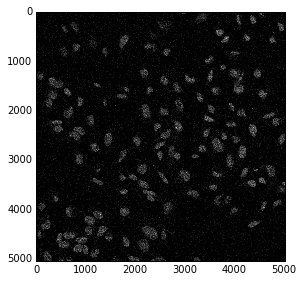

In [16]:
io.imshow(rescaled_equalized)

In [17]:
rescaled_equalized.dtype

dtype('float64')

In [18]:
rescaled_equalized.max()

1.0

In [19]:
rescaled_equalized =img_as_ubyte(rescaled_equalized)

/Users/keriabermudez/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


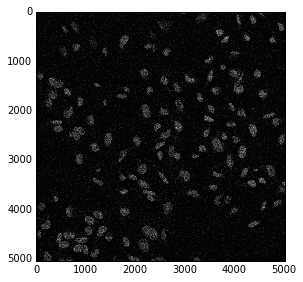

In [20]:
io.imshow(rescaled_equalized)

In [21]:
io.imsave('rescaled_equalized.tif', rescaled_equalized)

## Thresholding

In [22]:
th = threshold_otsu(rescaled_equalized)

In [23]:
th

34

In [24]:
binary = rescaled_equalized.copy()

In [25]:
binary[binary < th] = 0

In [26]:
binary[binary >= th] = 255

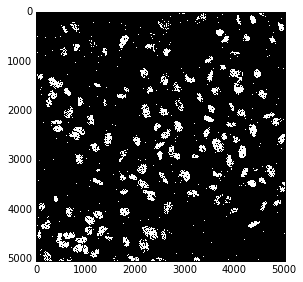

In [27]:
io.imshow(binary)

In [28]:
io.imsave("binary.tif", binary)

In [29]:
zoom = binary[2196:2484,2765:2994]

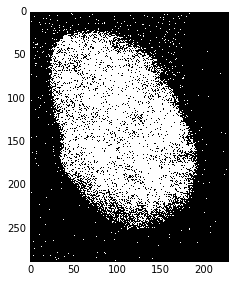

In [30]:
io.imshow(zoom)